# INFORM SEVERITY

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("INFORMSEVERITY.csv").convert_dtypes()

### Rows and columns 

In [8]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 25


In [5]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

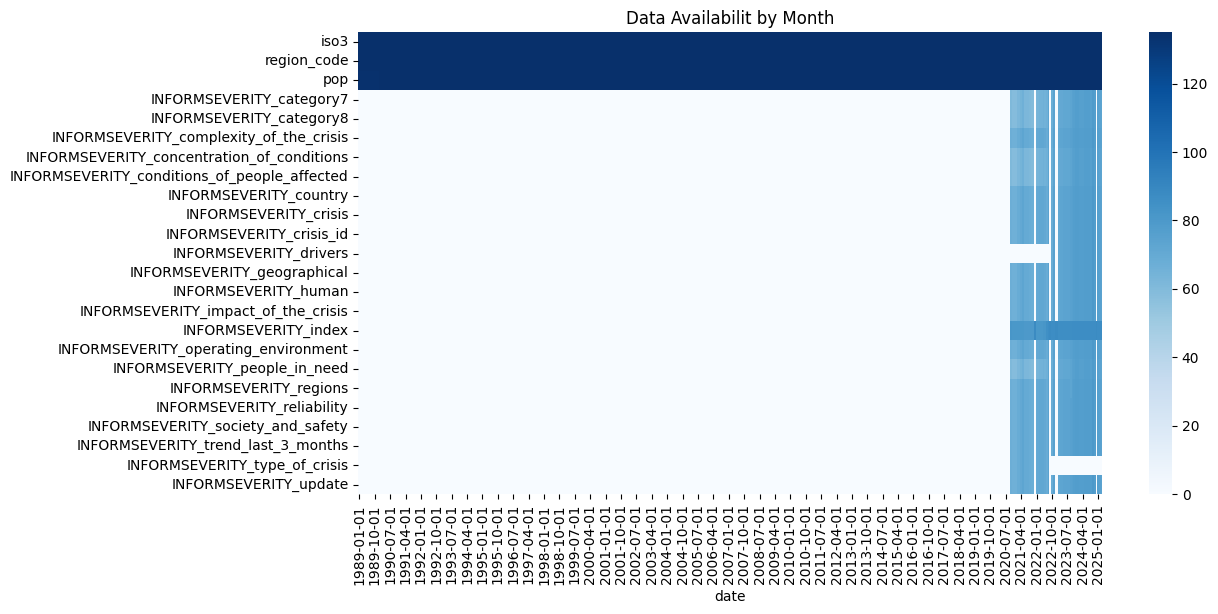

In [6]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

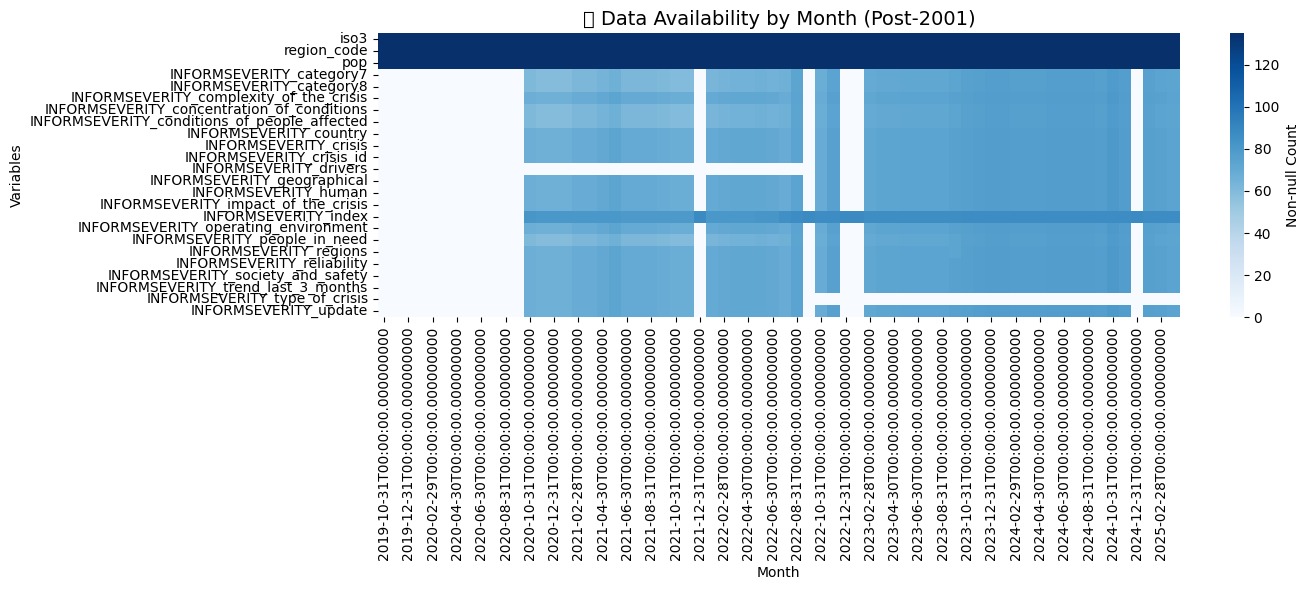

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'yearmon' to datetime format
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce')

# Step 2: Drop rows before 2001
df = df[df['date'] >= pd.to_datetime('2019-10-01')]

# Step 3: Set 'date' as index
df = df.set_index('date').sort_index()

# Step 4: Drop the original 'yearmon' column (optional)
df = df.drop(columns=['yearmon'])

# Step 5: Group by month and count non-null values
missing_by_month = df.groupby(pd.Grouper(freq='M')).count()

# Step 6: Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues', cbar_kws={'label': 'Non-null Count'})
plt.title('📅 Data Availability by Month (Post-2001)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


### Sample data and features

In [10]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,BGD,PLW,ZAF,GAB,ZWE
region_code,SAR,EAP,SSA,SSA,SSA
pop,171466990.0,17727.0,63212384.0,2484789.0,16340822.0
INFORMSEVERITY_category7,4,<NA>,<NA>,<NA>,4
INFORMSEVERITY_category8,High,<NA>,<NA>,<NA>,High
INFORMSEVERITY_complexity_of_the_crisis,2.8,<NA>,<NA>,<NA>,3.2
INFORMSEVERITY_concentration_of_conditions,3,<NA>,<NA>,<NA>,3
INFORMSEVERITY_conditions_of_people_affected,4.0,<NA>,<NA>,<NA>,3.9
INFORMSEVERITY_country,Bangladesh,<NA>,<NA>,<NA>,Zimbabwe
INFORMSEVERITY_crisis,Mutliple crises in Bangladesh,<NA>,<NA>,<NA>,Complex crisis in Zimbabwe


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8910 entries, 2019-10-01 to 2025-03-01
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   iso3                                          8910 non-null   string 
 1   region_code                                   8910 non-null   string 
 2   pop                                           8910 non-null   Float64
 3   INFORMSEVERITY_category7                      3396 non-null   Int64  
 4   INFORMSEVERITY_category8                      3396 non-null   string 
 5   INFORMSEVERITY_complexity_of_the_crisis       3578 non-null   Float64
 6   INFORMSEVERITY_concentration_of_conditions    3396 non-null   Int64  
 7   INFORMSEVERITY_conditions_of_people_affected  3396 non-null   Float64
 8   INFORMSEVERITY_country                        3578 non-null   string 
 9   INFORMSEVERITY_crisis                        

### Descriptive statistics of categorical columns

In [12]:
df.describe(include='string').T

,count,unique,top,freq
iso3,8910,135,AFG,66
region_code,8910,6,SSA,3102
INFORMSEVERITY_category8,3396,4,High,1184
INFORMSEVERITY_country,3578,89,South Sudan,49
INFORMSEVERITY_crisis,3578,137,Complex crisis in South Sudan,49
INFORMSEVERITY_crisis_id,3578,129,SSD001,49
INFORMSEVERITY_drivers,2045,79,Displacement,324
INFORMSEVERITY_regions,3576,6,Africa,1732
INFORMSEVERITY_reliability,3578,5,High,1588
INFORMSEVERITY_trend_last_3_months,3578,4,Stable,1563


### Descriptive statistics of numerical columns

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,8910.0,49852109.471044,174533312.975215,9816.0,2528654.0,11059820.0,33845617.0,1438069596.0
INFORMSEVERITY_category7,3396.0,3.693463,0.926757,2.0,3.0,4.0,4.0,5.0
INFORMSEVERITY_complexity_of_the_crisis,3578.0,2.92848,0.954449,0.7,2.2,2.9,3.7,5.1
INFORMSEVERITY_concentration_of_conditions,3396.0,3.040342,1.092412,1.0,3.0,3.0,4.0,5.0
INFORMSEVERITY_conditions_of_people_affected,3396.0,3.28005,1.09091,0.5,2.6,3.45,4.1,5.0
INFORMSEVERITY_geographical,3578.0,3.750978,1.206137,0.1,3.0,4.2,4.7,5.0
INFORMSEVERITY_human,3578.0,3.174134,0.984556,0.2,2.4,3.3,3.9,5.0
INFORMSEVERITY_impact_of_the_crisis,3578.0,3.438737,0.875465,0.9,2.8,3.5,4.1,5.0
INFORMSEVERITY_index,4570.0,2.404551,1.609528,0.0,0.0,2.7,3.7,5.0
INFORMSEVERITY_operating_environment,3578.0,2.867943,1.243136,0.0,2.0,3.0,4.0,5.0


### Deatils of missing values in the features

In [14]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
INFORMSEVERITY_type_of_crisis,7377,82.79
INFORMSEVERITY_drivers,6865,77.05
INFORMSEVERITY_category7,5514,61.89
INFORMSEVERITY_conditions_of_people_affected,5514,61.89
INFORMSEVERITY_concentration_of_conditions,5514,61.89
INFORMSEVERITY_people_in_need,5514,61.89
INFORMSEVERITY_category8,5514,61.89
INFORMSEVERITY_regions,5334,59.87
INFORMSEVERITY_reliability,5332,59.84
INFORMSEVERITY_impact_of_the_crisis,5332,59.84


In [15]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [16]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Availability of data by country

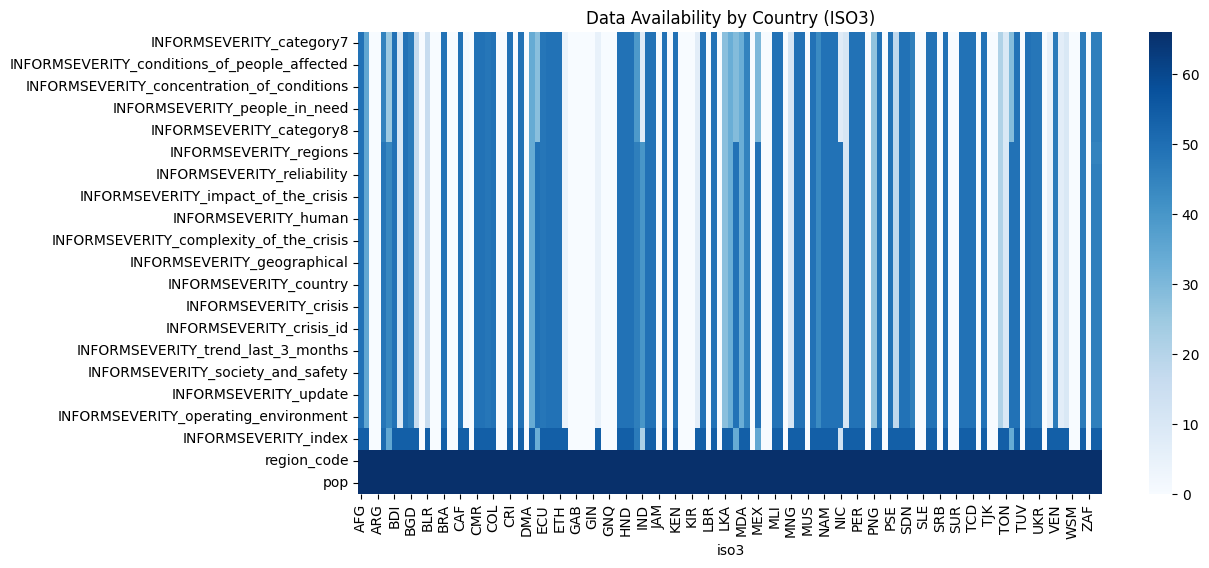

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availability of data by month

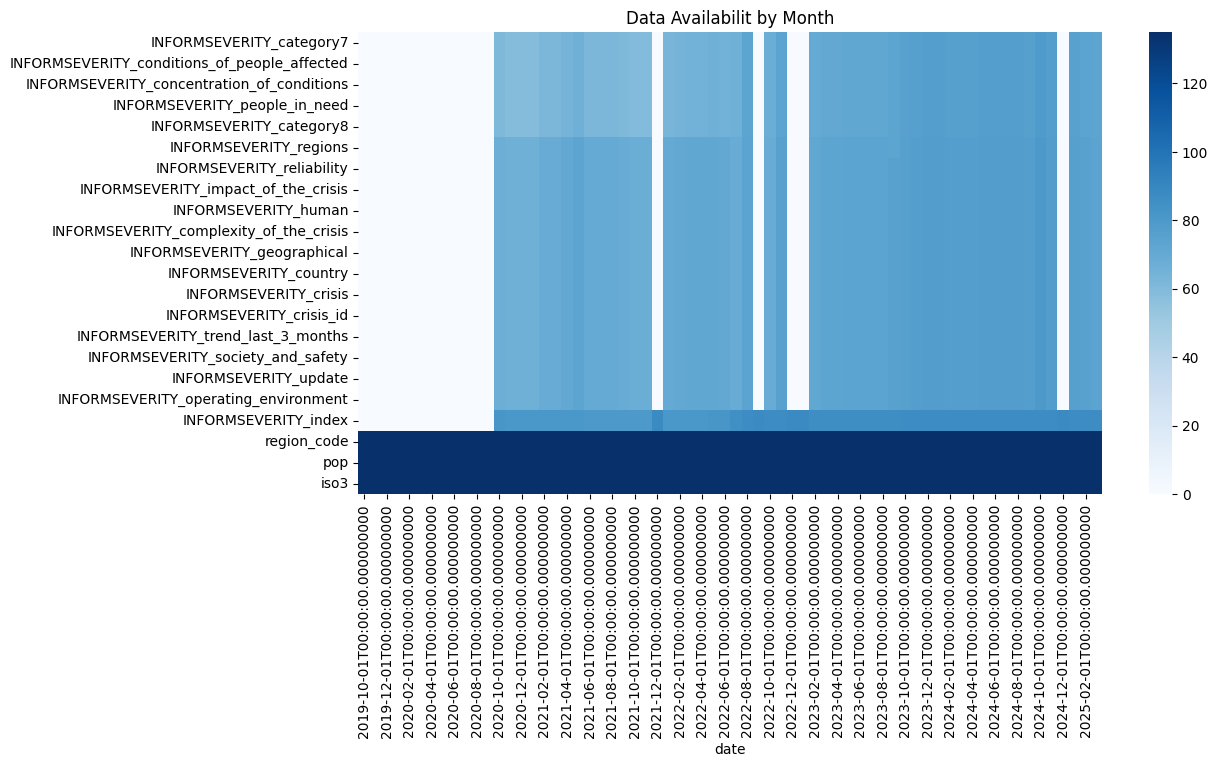

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [19]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

### Correlation between the features

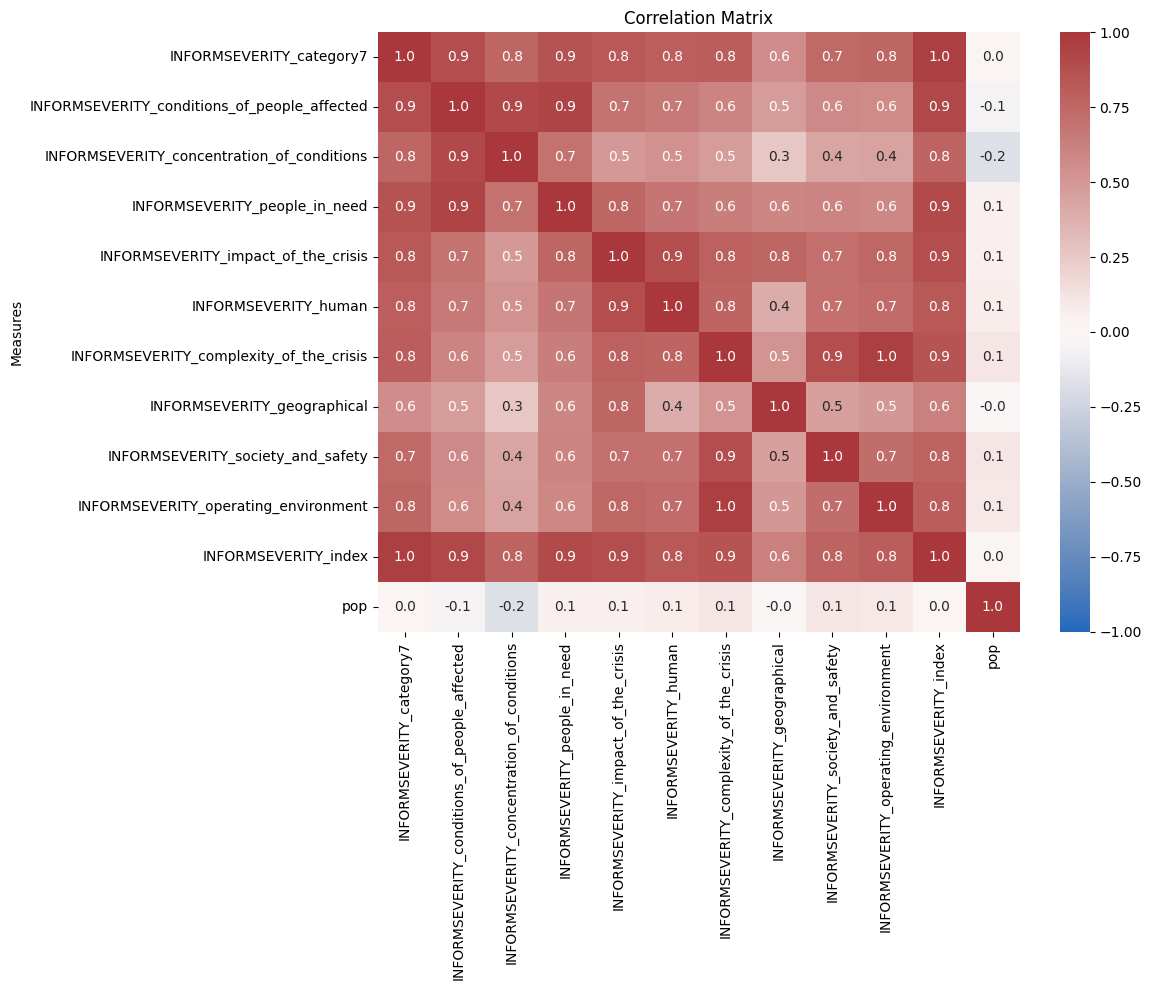

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

In [21]:
numeric_df.shape

(3396, 12)

### Principal Components Analysis of the features

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 2
Column names for PCA components: ['PC1', 'PC2']


In [23]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)

In [24]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

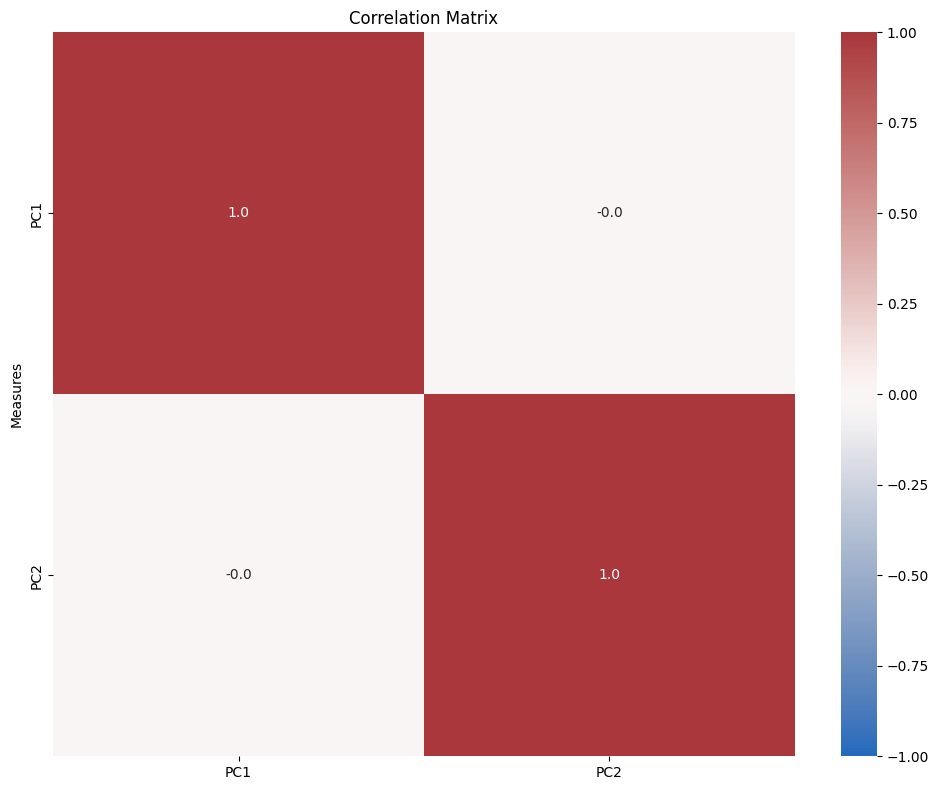

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance by Principal Component

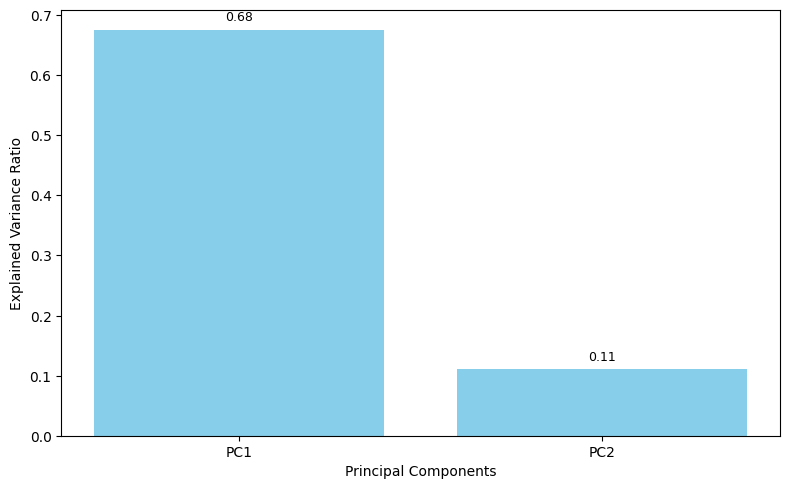

In [26]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Explained Variance

Cumulative explained variance at component 1: 0.6751


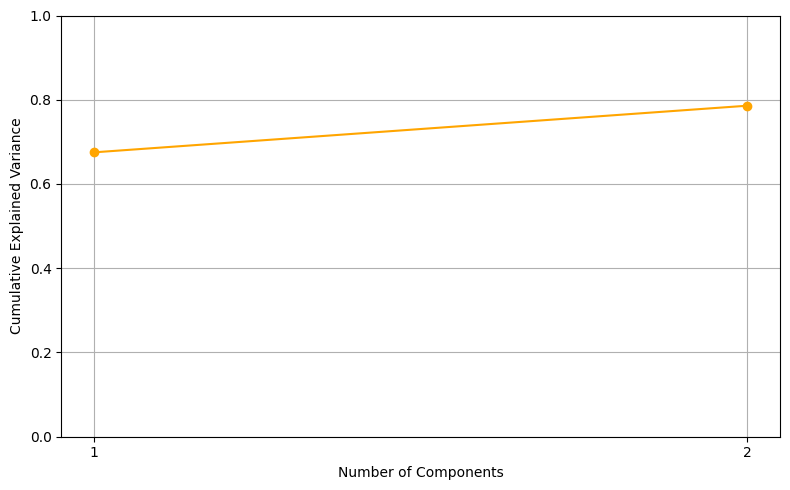

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 1 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

### PCA Loadings Heatmap

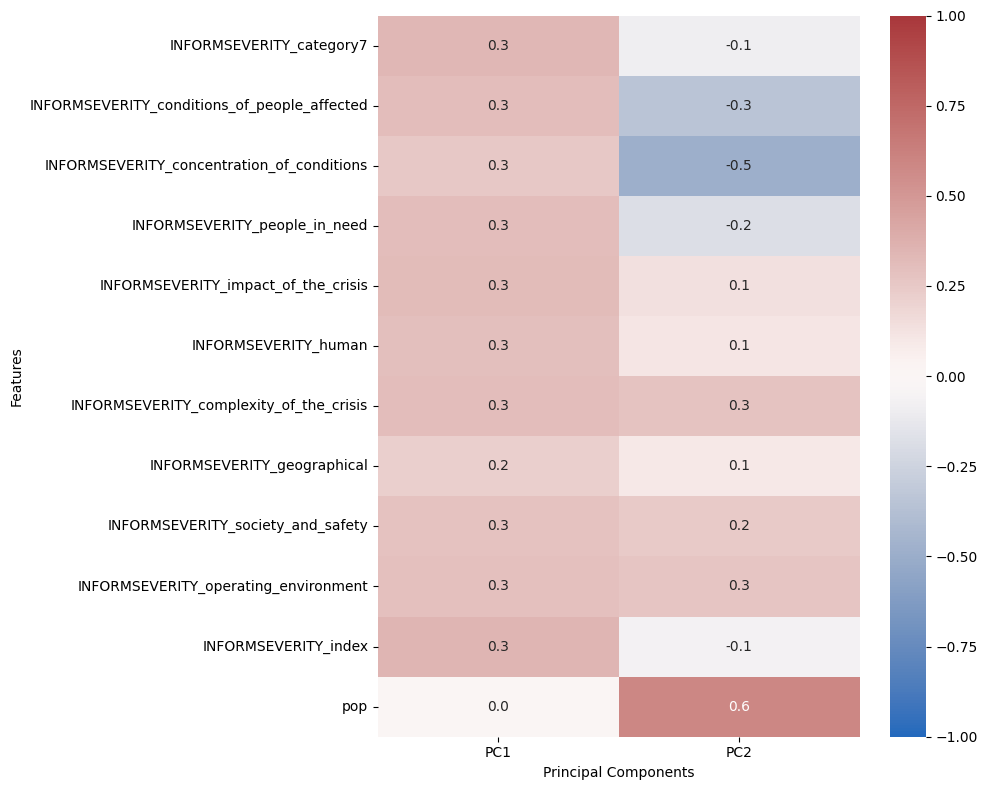

In [29]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [30]:
# Print PCA loadings matrix as plain text
print("🔢 PCA Loadings Matrix:\n")
print(loadings_df.round(2))  # Round to 2 decimal places for readability


🔢 PCA Loadings Matrix:

                                               PC1   PC2
INFORMSEVERITY_category7                      0.34 -0.09
INFORMSEVERITY_conditions_of_people_affected  0.31 -0.35
INFORMSEVERITY_concentration_of_conditions    0.25 -0.49
INFORMSEVERITY_people_in_need                 0.31 -0.18
INFORMSEVERITY_impact_of_the_crisis           0.32  0.13
INFORMSEVERITY_human                          0.30  0.11
INFORMSEVERITY_complexity_of_the_crisis       0.31  0.28
INFORMSEVERITY_geographical                   0.23  0.10
INFORMSEVERITY_society_and_safety             0.29  0.25
INFORMSEVERITY_operating_environment          0.29  0.27
INFORMSEVERITY_index                          0.35 -0.07
pop                                           0.01  0.59


## Interpretation

### PC1- Overall Humanitarian Severity, PC1 captures the magnitude and complexity of a humanitarian crisis